# Zhenfeng Liang

## I have R version 3.2.2 running on my machine

# MTH9875 Homework 1 

Assigned: August 27, 2015.
Due: September 10, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.


## Power laws

$$\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
$$
#### 1. (4 points)

Let $X_i$ be independent power-law distributed random variables, so that for large $x$,

$$
\Pr(X_i>x) \sim \frac{1}{x^{\zeta_{X_i}}} 
$$

 Prove the following properties of the tail exponents $\zeta_{X_i}$:

 (a) $$
\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha}%\label{eq:PLpower}
$$

(b) $$
\zeta_{\alpha\,X}=\zeta_{X}
%\label{eq:PLprod}
$$



## Solution:

### (a)

 Given 
 $$
 \Pr(X_i>x) \sim \frac{1}{x^{\zeta_{X_i}}} 
 $$
 
 We have 
 $$
 \Pr(X^a>x) \sim \frac{1}{x^{\zeta_{X^a}}} 
 $$
 
 With some rearrangement,
 $$
 \Pr(X^\alpha>x) = \Pr(X>x^{\frac{1}{\alpha}}) \sim \frac{1}{(x^{\frac{1}{\alpha}})^{\zeta_X}}
 $$
 
 So,
 
 $$
\zeta_{X^\alpha}=\frac{\zeta_{X}}{\alpha}%\label{eq:PLpower}
$$

### (b)

Similarly,

$$
\Pr(\alpha X > x) = \Pr(X > \frac{x}{\alpha}) \sim \frac{1}{(\frac{x}{\alpha})^{\zeta_X} } \sim \frac{1}{x^{\zeta_{\alpha X}}}
$$

So, 
 $$
\zeta_{\alpha\,X}=\zeta_{X}
%\label{eq:PLprod}
$$




The following code snippet loads the data required for this homework assignment.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/08/9875HW1.zip", destfile="9875HW1.zip")
unzip(zipfile="9875HW1.zip")

#### 2. (8 points)

(a) Convert the file `SSRN.csv` (which contains paper download numbers and ranks) to a data frame.

(b) Draw a log-log plot of number of paper downloads ($y$) vs download rank ($x$).

(c) Regress $y$ vs $x$ and superimpose the resulting fit on your plot from part (b).

(d) Write down the empirical power-law you have found in the form

$$
y = C x^\alpha.
$$

In [2]:
# (a)

paper_ranks <- read.csv(file="SSRN.csv", header=TRUE, sep=",")


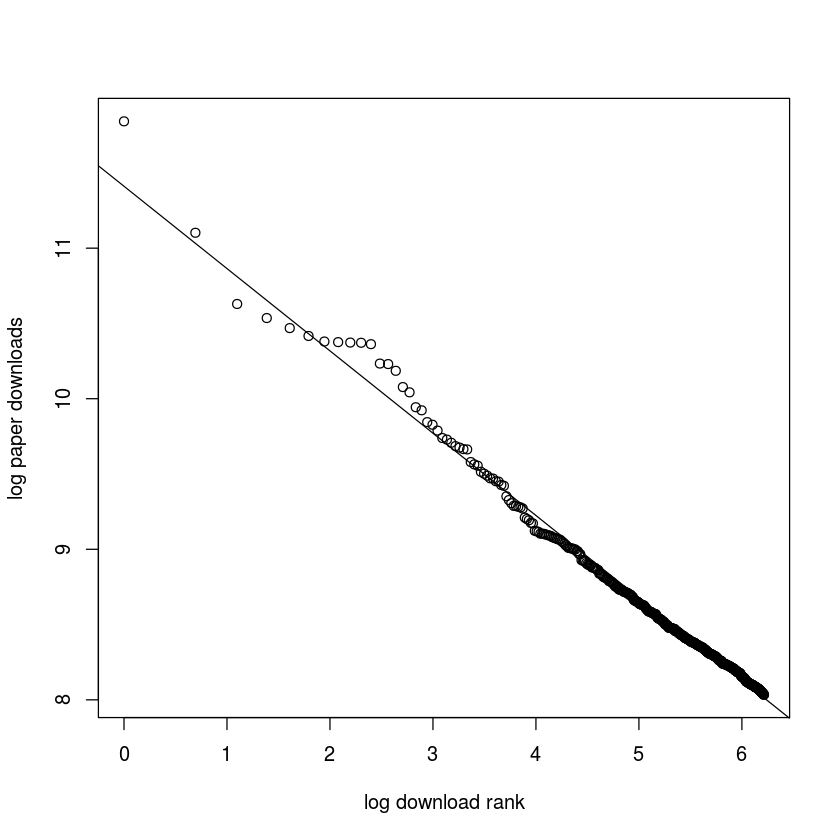

In [3]:
# (b)

lg_rank <- log(paper_ranks$Rank)
lg_downloads <- log(paper_ranks$Total.New.Downloads)
plot(lg_rank, lg_downloads, ylab = "log paper downloads", xlab = "log download rank")

# (c)
lm_res <- lm(lg_downloads~lg_rank)
abline(lm_res)

In [4]:
# (d)
lm.sum <- summary(lm_res)
intercept <- coef(lm.sum)[1, 1]
slope <- coef(lm.sum)[2,1]
C <- exp(intercept)
a <- slope

cat("The empirical power law I have found is, C = ", C, " a = ", a)

The empirical power law I have found is, C =  90312.34  a =  -0.546707

#### 3. (8 points)

Repeat all four parts of question 2. for the dataset `Cities.csv`.

In [5]:
# (a)

cities_ranks <- read.csv(file="Cities.csv", header=TRUE, sep=",")

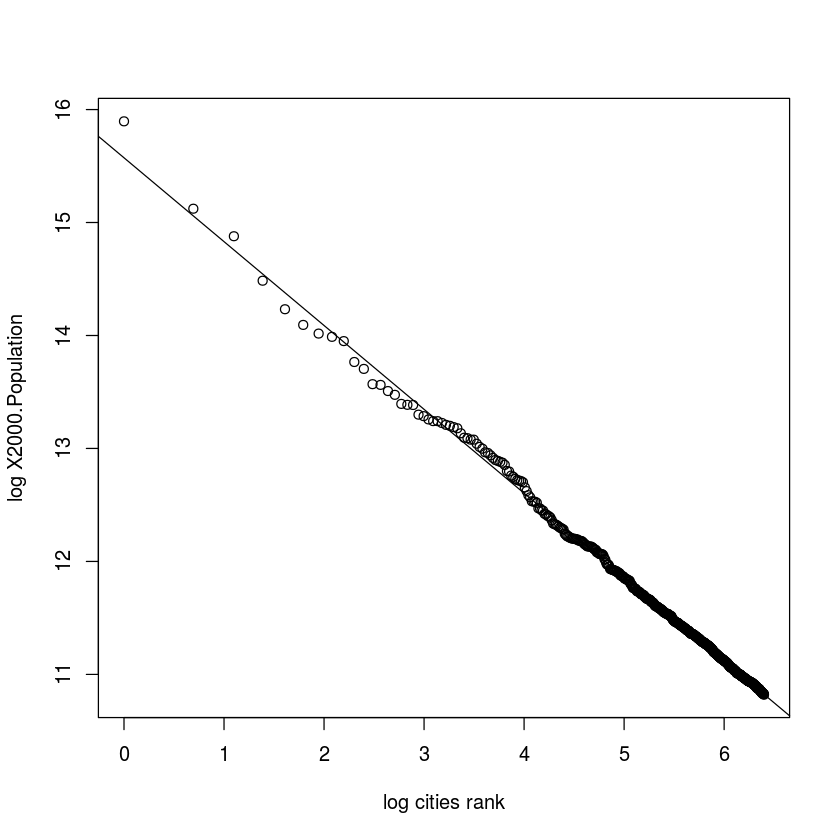

In [6]:
# (b)

lg_city_rank <- log(cities_ranks$Rank)
lg_population <- log(cities_ranks$X2000.Population)
plot(lg_city_rank, lg_population, ylab = "log X2000.Population", xlab = "log cities rank")

# (c)
lm_city_res <- lm(lg_population~lg_city_rank)
abline(lm_city_res)

In [7]:
# (d)
lm.sum <- summary(lm_city_res)
intercept <- coef(lm.sum)[1, 1]
slope <- coef(lm.sum)[2,1]
C <- exp(intercept)
a <- slope

cat("The empirical power law I have found is, C = ", C, " a = ", a)

The empirical power law I have found is, C =  5796593  a =  -0.7422482

#### 4. (12 points.)

(a) Assuming that SPX daily returns are Student-t distributed with $\nu=3$, mean $0$ and standard deviation of $1\%$,  what is the chance of a daily move of more than $10\%$?  Of more than $20\%$? How many years should we expect to wait to get moves of over $10\%$ and $20\%$ respectively? 

(b) Repeat the same computation assuming SPX daily returns are normally distributed.  Include in your answer all steps in your computation.

Recall that the SPX dropped $23\%$ on October 19, 1987.  
   
(c) Should this one-day move have been unexpected?  

(d) How many years would we expect to wait to get a move of this magnitude assuming SPX returns are normally distributed?  

(e) Compare your answer with the life of the universe so far (around 13.7 billion years).

In [8]:
nu = 3
sdSPX = 0.01
scale <- function(nu){sqrt(nu/(nu-2))} 
trading_days_per_year <- 252

In [9]:
### (a) 
pt_exceed_tail_prob <- function(x){2 * (1 - pt(x*scale(nu)/sdSPX,df=nu))}


prob_10_perc_t_dist <- pt_exceed_tail_prob(0.1)
prob_20_perc_t_dist <- pt_exceed_tail_prob(0.2)
cat("Chance of daily move of more than 10%, using t distribution, is", prob_10_perc_t_dist)
cat("\nChance of daily move of more than 20%, using t distribution, is", prob_20_perc_t_dist)
cat("\nUnder t distribution assumption, expected years we need to wait for daily move more than 10% is", 1 / prob_10_perc_t_dist / trading_days_per_year, "years")
cat("\nUnder t distribution assumption, expected years we need to wait for daily move more than 20% is", 1 / prob_20_perc_t_dist / trading_days_per_year, "years")


Chance of daily move of more than 10%, using t distribution, is 0.0004193742
Chance of daily move of more than 20%, using t distribution, is 5.289292e-05
Under t distribution assumption, expected years we need to wait for daily move more than 10% is 9.462322 years
Under t distribution assumption, expected years we need to wait for daily move more than 20% is 75.0243 years

In [10]:
### (b) 

pnorm_exceed_tail_prob <- function(x){2 * pnorm(-1 * x,mean=0,sd=sdSPX)}
prob_10_perc_norm_dist <- pnorm_exceed_tail_prob(0.1)
prob_20_perc_norm_dist <- pnorm_exceed_tail_prob(0.2)

cat("Chance of daily move of more than 10%, using normal distribution, is ", prob_10_perc_norm_dist)
cat("\nChance of daily move of more than 20%, using normal distribution, is ", prob_20_perc_norm_dist)
cat("\nUnder normal distribution assumption, expected years we need to wait for daily move more than 10% is", 1 / prob_10_perc_norm_dist / trading_days_per_year, "years")
cat("\nUnder normal distribution assumption, expected years we need to wait for daily move more than 20% is", 1 / prob_20_perc_norm_dist / trading_days_per_year, "years")


Chance of daily move of more than 10%, using normal distribution, is  1.523971e-23
Chance of daily move of more than 20%, using normal distribution, is  5.507248e-89
Under normal distribution assumption, expected years we need to wait for daily move more than 10% is 2.603891e+20 years
Under normal distribution assumption, expected years we need to wait for daily move more than 20% is 7.205511e+85 years

In [11]:
### (c)

prob_drop_23_perc_t_dist <- pt_exceed_tail_prob(0.23) / 2
cat("Under t distribution, we expect to wait", 1 / prob_drop_23_perc_t_dist / trading_days_per_year, "years to get 23% daily move")
cat("\nConsidering two financial crisis in 1987 and 2008, this one is expected under t distribution assumption")

Under t distribution, we expect to wait 228.0386 years to get 23% daily move
Considering two financial crisis in 1987 and 2008, this one is expected under t distribution assumption

In [12]:
### (d)

prob_drop_23_perc_norm_dist <- pnorm_exceed_tail_prob(0.23) / 2
cat("Under normal assumption, expected years we need to wait is", 1/prob_drop_23_perc_norm_dist/trading_days_per_year, "years, which is much longer than the life of the universe")

Under normal assumption, expected years we need to wait is 1.702648e+114 years, which is much longer than the life of the universe

### (e)

From the output above, we can see that, the expected years we need to wait to get a move of October 19, 1987 is much larger than the life of the universe.

## Stylized facts

#### 5.  (0 points)
Run my R-code in `9875Lecture1-2015.ipynb` and try to understand how it works.

#### 6. (6 points) 

The code snippet below loads the data file `spxVix.rData`.  

(a) Write R-code to compute 
   - The average log-return conditional on the log-return being non-negative.
   - The average log-return conditional on the log-return being negative.

(b) What proportion of all moves are up-moves? Down-moves?  
   
(c) Relate your findings to one of the Rama Cont stylized facts.


In [13]:
load("spxVix.rData")

In [14]:
### load data and for question (a) functions

vix <- spxVixData[,"Cl.VIX"]
spx <- spxVixData[,"Cl.GSPC"]

ret.spx <- log(spx[-length(spx)]/spx[-1])
ret.spx <- ret.spx[!is.na(ret.spx)]  # Remove missing values

ret.vix <- log(vix[-length(vix)]/vix[-1])
ret.vix <- ret.vix[!is.na(ret.vix)]  # Remove missing values

cal_average_condition_on_negative <- function(ret){
    mean(ret[ret<0])
}

cal_average_condition_on_non_negative <- function(ret){
    mean(ret[ret>=0])
}


In [15]:
### (a)

cat("VIX, average log-return conditional on the log-return being non-negative is ", cal_average_condition_on_non_negative(ret.vix))
cat("\nVIX, average log-return conditional on the log-return being negative is ", cal_average_condition_on_negative(ret.vix))

cat("\nSPX, average log-return conditional on the log-return being non-negative is ", cal_average_condition_on_non_negative(ret.spx))
cat("\nSPX, average log-return conditional on the log-return being negative is ", cal_average_condition_on_negative(ret.spx))

VIX, average log-return conditional on the log-return being non-negative is  0.04256691
VIX, average log-return conditional on the log-return being negative is  -0.04796371
SPX, average log-return conditional on the log-return being non-negative is  0.007949419
SPX, average log-return conditional on the log-return being negative is  -0.00743331

In [16]:
### question (b) functions

cal_proportion_up_move <-function(ret){
    len <- length(ret)
    up_len <- length(ret[ret>=0])
    return (up_len / len)
}


In [17]:
### (b)

up.pro.vix = cal_proportion_up_move(ret.vix)
cat("VIX, up move proportion: ", up.pro.vix)
cat("\nVIX, down move proportion: ", 1 - up.pro.vix)

up.pro.spx = cal_proportion_up_move(ret.spx)
cat("\nSPX, up move proportion: ", up.pro.spx)
cat("\nSPX, down move proportion: ", 1 - up.pro.spx)

VIX, up move proportion:  0.5285471
VIX, down move proportion:  0.4714529
SPX, up move proportion:  0.4666564
SPX, down move proportion:  0.5333436

### (C)

(a) shows us Conditional heavy tails.

(b) shows us Leverage effect. For VIX, a measure of volatility of the market, proportion of up move is larger than the proportion of down move. For SPX, a measure of the market asset return, proportion of up move is smaller than the proportion of the down move.

#### 7. (8 points) 

DAX is a German stock index analogous to the SPX index.  VDAX is the volatility index (VIX) of DAX.

(a) Using the lecture code as a template, use the `quantmod` package to download time series of DAX and VDAX.

(b) Regress VDAX log returns vs DAX log returns. What is the $R^2$ of this regression? What is the correlation? 

(c) Draw a scatter plot of VDAX log returns vs DAX log returns. Superimpose your linear fit from part (b) to make a diagram exactly like Figure 12 of Lecture 1.

In [18]:
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [19]:
### (a)

options("getSymbols.warning4.0"=FALSE)
getSymbols("^GDAXI",from="1927-01-01") #Creates the time series object DAX
getSymbols("^VDAX",from="1927-01-01") #Creates the time series object VDAX

[1] "GDAXI"

[1] "VDAX"

In [20]:
### (b)

mm <- specifyModel(Cl(VDAX)~Cl(GDAXI))
# mm <- specifyModel(Cl(GDAXI)~Cl(VDAX))
daxVdaxData <-modelData(mm) #quantmod function automatically aligns data from two series


dax <- daxVdaxData[, 'Cl.GDAXI']
vdax <- daxVdaxData[, 'Cl.VDAX']

ret.dax <- log(dax/lag(dax))
ret.dax <- ret.dax[!is.na(ret.dax)]  # Remove missing values

ret.vdax <- log(vdax/lag(vdax))
ret.vdax <- ret.vdax[!is.na(ret.vdax)]  # Remove missing values

fit.daxVdax <- lm(ret.vdax~ret.dax)
lm.sum <- summary(fit.daxVdax)

corr <- coef(lm.sum)[2,1] * sd(ret.dax) / sd(ret.vdax)
R2 <- lm.sum$r.squared


cat("Under regression model VDAX~DAX, we have R squared ", R2, " and the correlation is ", corr)

Under regression model VDAX~DAX, we have R squared  0.5135382  and the correlation is  -0.7166158

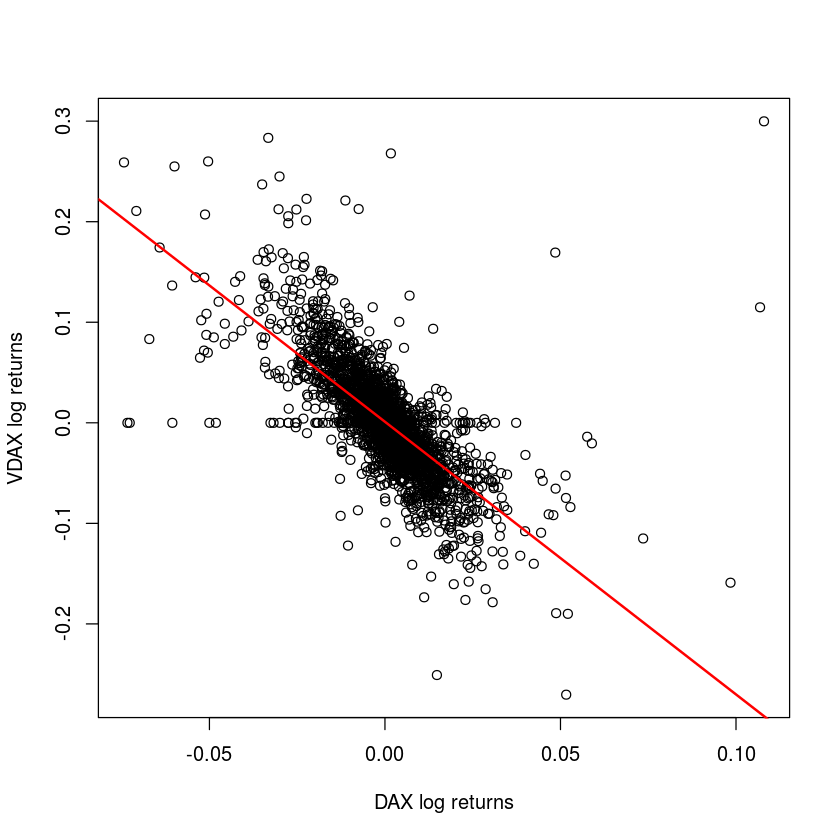

In [21]:
### (c)

# Scatter plot + fit
plot(as.numeric(ret.dax),as.numeric(ret.vdax),xlab="DAX log returns",ylab="VDAX log returns")
abline(fit.daxVdax,col="red",lwd=2)
